#  서울특별시 코로나 바이러스 크롤링 데이터

## 1. 전처리

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt


In [3]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'


Matplotlib is building the font cache; this may take a moment.


In [4]:
corona_data = pd.read_csv('C:\study\workspace_python\pdsample\datasets\mydata\corona_df_2021_08_14.csv', encoding = 'utf-8')

In [5]:
corona_data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,70870,222111,2021-08-13,기타,-,감염경로 조사중,NaN
1,70869,221232,2021-08-13,기타,-,감염경로 조사중,NaN
2,70868,221356,2021-08-13,성북구,-,감염경로 조사중,NaN
3,70867,221710,2021-08-13,동대문구,-,감염경로 조사중,NaN
4,70866,220502,2021-08-13,타시도,-,기타 확진자 접촉,NaN


In [6]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40400 entries, 0 to 40399
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      40400 non-null  int64 
 1   환자      40400 non-null  int64 
 2   확진일     40400 non-null  object
 3   거주지     40400 non-null  object
 4   여행력     40400 non-null  object
 5   접촉력     40400 non-null  object
 6   퇴원현황    31778 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


## 1.1 Null 값 처리

<AxesSubplot:>

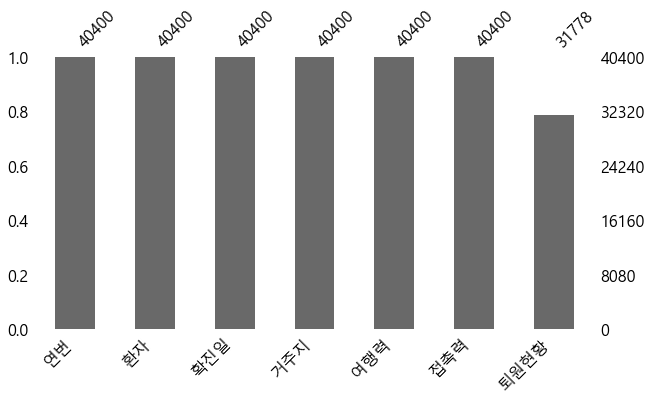

In [7]:
import missingno as msno

msno.bar(corona_data, figsize = (10,5))

<AxesSubplot:>

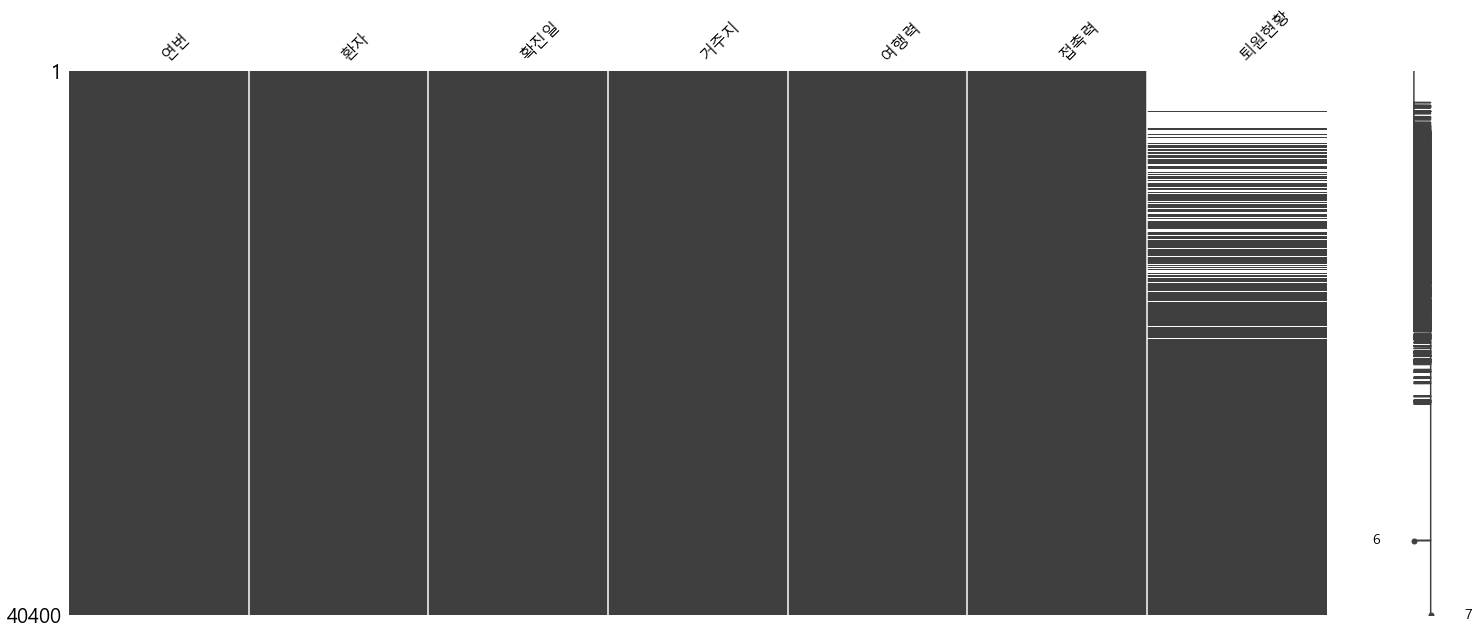

In [8]:
msno.matrix(corona_data)

### 1.1.2 퇴원현황 column

- 퇴원현황만 null 값 있는 거 확인.

In [9]:
counted_null = corona_data['퇴원현황'].isnull().sum()
print('코로나 크롤링 데이터 퇴원현황 null 개수 : ', counted_null)

코로나 크롤링 데이터 퇴원현황 null 개수 :  8622


In [10]:
# https://www.seoul.go.kr/coronaV/coronaStatus.do 
# 사이트를 확인해보니 퇴원하기 전 퇴원현황을 Null 값으로 처리했다는 것을 유추가능.
# null 을 '퇴원전' 으로 수정

-

corona_data['퇴원현황'].unique()

SyntaxError: invalid syntax (<ipython-input-10-a03c554b2926>, line 5)

In [ ]:
corona_data['퇴원현황'] = corona_data['퇴원현황'].fillna('퇴원전')


In [ ]:
msno.bar(corona_data, figsize = (10,5))

### 1.1.3 여행력 column

In [ ]:
corona_data['여행력'].unique()

In [ ]:
#"-" 를 여행력 없음으로 간주, 보기 쉽게 바꿀 예정

counted_null2 = len(corona_data[corona_data['여행력'] == '-'])
print('여행력 column null 값 개수 : ', counted_null2)
corona_data[corona_data['여행력'] == '-']

In [ ]:
corona_data['여행력'].replace('-','없음', inplace = True)

In [ ]:
corona_data.head()

## 2. Feature Engineering

## 2.1 칼럼 삭제

In [ ]:
corona_data.head()

In [ ]:
corona_data.drop(['연번'], axis = 1,inplace = True)

In [ ]:
corona_data['확진일'].unique()

## 2.2 칼럼 생성

확진일을 연도, 월, 일로 나누기

In [ ]:
corona_data['연도'] = corona_data['확진일'].str.split('-', expand = True)[0]
corona_data['월'] = corona_data['확진일'].str.split('-', expand = True)[1]
corona_data['일'] = corona_data['확진일'].str.split('-', expand = True)[2]


In [ ]:
#자료형 변경

corona_data['월'] = corona_data['월'].astype(int)
corona_data['일'] = corona_data['일'].astype(int)

In [ ]:
corona_data.drop('확진일', axis = 1, inplace = True)

In [ ]:
len(corona_data[(corona_data['월'] == 8) & (corona_data['일'] == 13)])

## 3. 칼럼별 기술통계

In [ ]:
corona_data.describe()

### 3.1 연번

In [ ]:
corona

### 3.2 환자

### 3.3 확진일

###  3.4 거주지

### 3.5 여행력

### 3.6 접촉력

### 3.7 퇴원현황

# 서울특별시 예방접종센터 현황 데이터

## 전처리

In [ ]:
pd.read_csv('C:\study\workspace_python\pdsample\datasets\mydata\공공데이터활용지원센터_코로나19 예방접종센터 현황_20210716.csv', encoding = 'cp949')

In [ ]:
pd.read_csv('C:\study\workspace_python\pdsample\datasets\mydata\DLA_2nd_ORIGIN_DLADATA202004_20210730120000.csv', header=None)

# 코로나 19 여행사업 관련 데이터 

In [20]:
trip_df = pd.read_excel('C:\\study\\workspace_python\\pdsample\\datasets\\mydata\\코로나19 여행관련 데이터.xlsx')

In [46]:
trip_df.T

,0,1,2,3,4,5,6
항목,관광/여행,관광/여행,관광/여행,관광/여행,관광/여행,관광/여행,관광/여행
세부항목,호텔업,여관업,여행사업,항공여객운송업,철도여객운송업,휴양콘도운영업,관광/여행 지수
2021년 06월,89.7,67.7,22.5,23.9,98.8,79.3,50.5
2021년 05월,85.8,67.6,17.4,25.2,102.8,71.5,49.6
2021년 04월,77.1,64.4,17.7,21.3,91.8,60.0,44.5
...,...,...,...,...,...,...,...
2010년 05월,110.6,99.8,95.0,71.2,72.7,105.0,87.5
2010년 04월,102.3,103.1,82.6,66.3,63.9,97.7,81.3
2010년 03월,103.9,104.3,63.6,68.0,62.7,80.0,78.7
2010년 02월,94.5,98.5,67.0,61.1,68.0,109.3,76.3


In [140]:
wanted_data = trip_df.T.iloc[2:20,2]
visualization_df = wanted_data.reset_index()

In [142]:
visualization_df = visualization_df.rename(columns = {2 : 'results'})
visualization_df.head()

,index,results
0,2021년 06월,22.5
1,2021년 05월,17.4
2,2021년 04월,17.7
3,2021년 03월,16.7
4,2021년 02월,13.3


In [143]:
b['results'] = b['results'].astype(int)

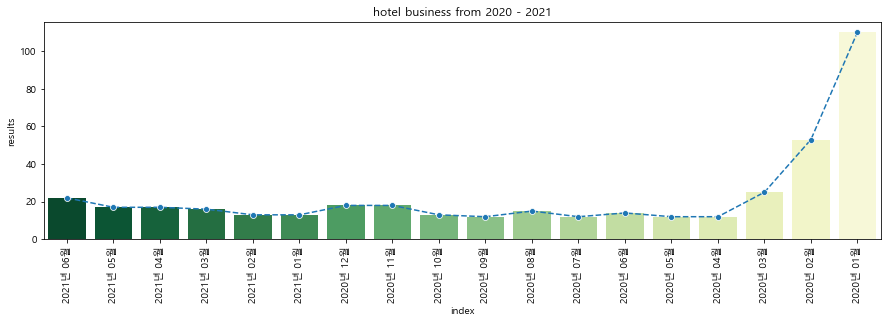

In [145]:
plt.figure(figsize = (15,4))
plt.title('hotel business from 2020 - 2021')
sns.lineplot(data = b, x = 'index', y = 'results', linestyle = '--', marker = 'o')
sns.barplot(data = b, x = 'index', y = 'results', palette='YlGn_r')
plt.xticks(rotation = 90)
plt.savefig('foryongju')

<AxesSubplot:>

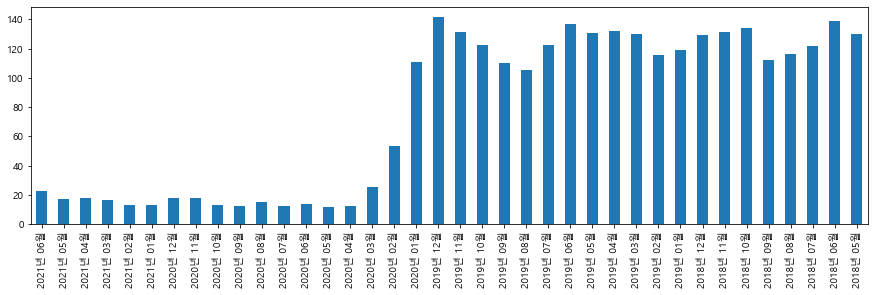

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,4))
trip_df.T.iloc[2:40,2].plot(kind = 'bar')